# Hazard assessment: Visualise climate indicators

- A workflow from the CLIMAAX [Handbook](https://handbook.climaax.eu/) and [MULTI_infrastructure](https://github.com/CLIMAAX/MULTI_infrastructure) GitHub repository.
- See our [how to use risk workflows](https://handbook.climaax.eu/notebooks/workflows_how_to.html) page for information on how to run this notebook.

## Preparation work

### Load libraries

In [1]:
import os

import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

### Area of interest

In [2]:
region_name = 'IT'

### Path configuration

This notebook processes NetCDF files containing data about the number of days where maximum temperature exceeds specific thresholds (e.g., 35°C, 40°C, 45°C) that was calculates previously in the notebook "02_UERRA_indicatorsCalculation.ipynb" and generates maps visualizing these exceedances over Italy.

- We load a shapefile of Europe, then we isolate the portion of the shapefile that corresponds to Italy.
- We search for the *indicators_path* for all NetCDF files that start with 'NumbDays', which contain the number of days with temperatures exceeding the thresholds.
These files are sorted for further processing.

In [3]:
# Path to the folder containing the NetCDF files
indicators_path = f'../data_{region_name}/indicators/uerra'

# Path to save the maps
output_maps = os.path.join(indicators_path, 'maps')
os.makedirs(output_maps, exist_ok=True)

### Plotting helpers

In [4]:
def configure_map(ax, title=None):
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS, linestyle='-', edgecolor='black')
    gl = ax.gridlines(draw_labels=True, linewidth=0.5, color='gray', alpha=0.0)
    gl.top_labels = False
    gl.right_labels = False
    gl.xformatter = LongitudeFormatter()
    gl.yformatter = LatitudeFormatter()
    if title is not None:
        ax.set_title(title)

## Maps of the number of days of above 35, 40 and 45°C

For each NetCDF file, we extract the variabble *tx_days_above*, which represents the number of days exceeding the temperature thresholds.
We create a mask using the Italy shapefile to limit the data to within Italy’s borders, and the masked data are stored for later use.

In [5]:
thresholds = [35, 40, 45]  # °C

NumbDays_arrays = {}
global_min_NumbDays =  np.inf
global_max_NumbDays = -np.inf

for threshold in thresholds:
    NumbDays = xr.open_dataarray(os.path.join(indicators_path, f"NumbDaysAbove{threshold}.nc"))
    NumbDays_arrays[threshold] = NumbDays
    # Keep track of min and max values for colorbar scaling
    global_min_NumbDays = np.nanmin([global_min_NumbDays, np.nanmin(NumbDays.values)])
    global_max_NumbDays = np.nanmax([global_max_NumbDays, np.nanmax(NumbDays.values)])

print(f"Global min: {global_min_NumbDays}, Global max: {global_max_NumbDays}")

Global min: 0.0, Global max: 54.8


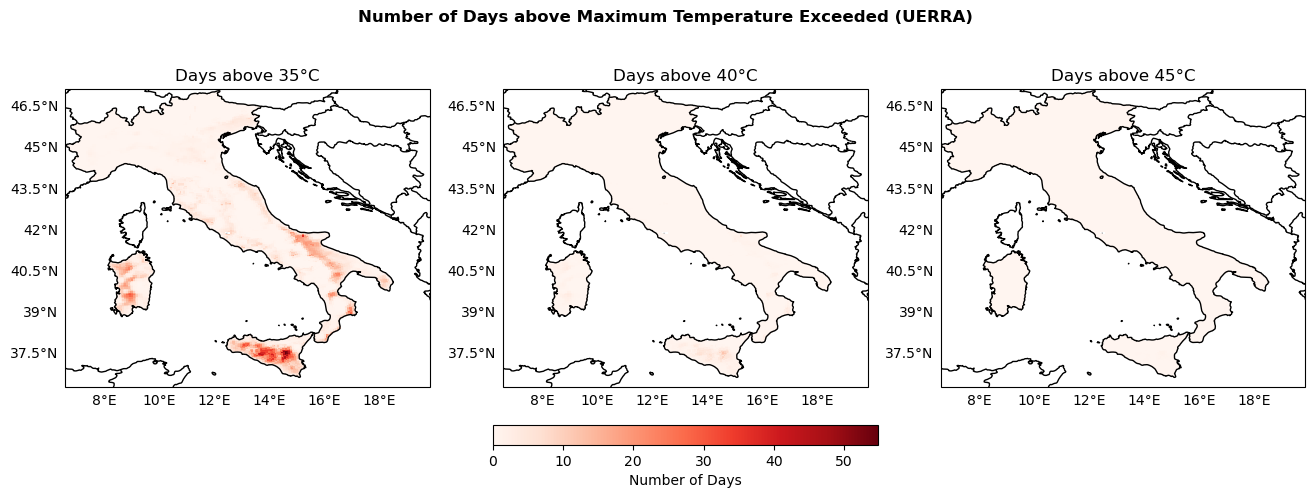

In [6]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(16, 5), subplot_kw={'projection': ccrs.PlateCarree()})
fig.suptitle('Number of Days above Maximum Temperature Exceeded (UERRA)', fontweight='bold')

plot_kwargs = {
    'cmap': 'Reds',
    'vmin': global_min_NumbDays,
    'vmax': global_max_NumbDays,
    'transform': ccrs.PlateCarree()
}
for ax, threshold in zip(axs, thresholds):
    configure_map(ax, title=f'Days above {threshold}°C')
    da = NumbDays_arrays[threshold]
    im = ax.pcolormesh(da['longitude'], da['latitude'], da.values, **plot_kwargs)

fig.colorbar(im, ax=axs, orientation='horizontal', fraction=0.05, pad=0.1, label='Number of Days')

fig.savefig(os.path.join(output_maps, "UERRA_NumDaysTempExceeded_comparison.png"))

## Maps of the percentiles of extreme temperature

In [7]:
percentiles = [95., 99.9]

TempPercentile_arrays = {}
global_min_TempPercentile =  np.inf
global_max_TempPercentile = -np.inf

for percentile in percentiles:
    perc_filename = str(percentile).rstrip("0").replace(".", "")
    TempPercentile = xr.open_dataarray(os.path.join(indicators_path, f"Temp_P{perc_filename}.nc"))
    TempPercentile_arrays[percentile] = TempPercentile
    # Keep track of max and min values for colorbar scaling
    global_min_TempPercentile = np.nanmin([global_min_TempPercentile, np.nanmin(TempPercentile.values)])
    global_max_TempPercentile = np.nanmax([global_max_TempPercentile, np.nanmax(TempPercentile.values)])

print(f"Global min: {global_min_TempPercentile}, Global max: {global_max_TempPercentile}")

Global min: 10.918024063110352, Global max: 47.45762634277344


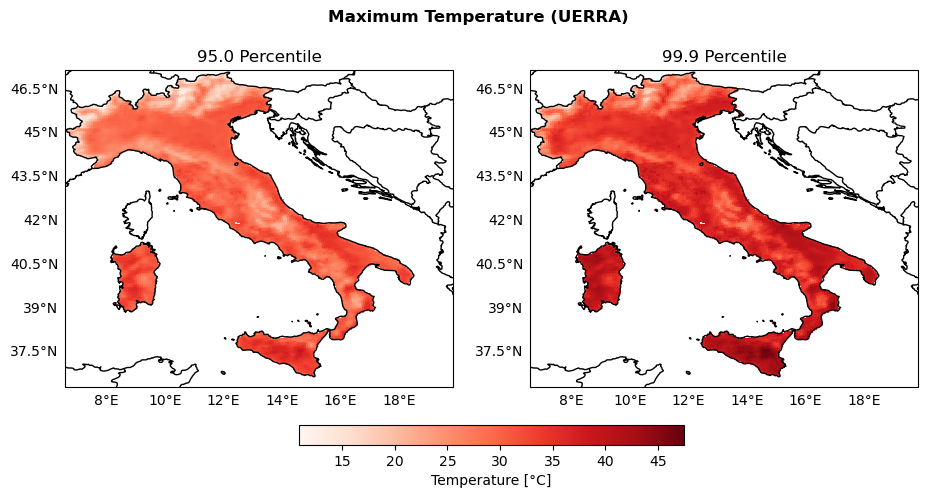

In [8]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(11, 5), subplot_kw={'projection': ccrs.PlateCarree()})
fig.suptitle('Maximum Temperature (UERRA)', fontweight='bold')

plot_kwargs = {
    'cmap': 'Reds',
    'vmin': global_min_TempPercentile,
    'vmax': global_max_TempPercentile,
    'transform': ccrs.PlateCarree()
}
for ax, percentile in zip(axs, percentiles):
    configure_map(ax, title=f'{percentile} Percentile')
    da = TempPercentile_arrays[percentile]
    im = ax.pcolormesh(da['longitude'], da['latitude'], da.values, **plot_kwargs)

fig.colorbar(im, ax=axs, orientation='horizontal', fraction=0.05, pad=0.1, label='Temperature [°C]')

fig.savefig(os.path.join(output_maps, "UERRA_Temp_percentiles_comparison.png"))

## Maps of Percentiles 99, 99.5 and 99.9 of Precipitation

In [9]:
percentiles = [99., 99.5, 99.9]

PrecipPercentile_arrays = {}
global_min_PrecipPercentile =  np.inf
global_max_PrecipPercentile = -np.inf

for percentile in percentiles:
    perc_filename = str(percentile).rstrip("0").replace(".", "")
    PrecipPercentile = xr.open_dataarray(os.path.join(indicators_path, f"Precip_P{perc_filename}.nc"))
    PrecipPercentile_arrays[percentile] = PrecipPercentile
    # Keep track of max and min values for colorbar scaling
    global_min_PrecipPercentile = np.nanmin([global_min_PrecipPercentile, np.nanmin(PrecipPercentile.values)])
    global_max_PrecipPercentile = np.nanmax([global_max_PrecipPercentile, np.nanmax(PrecipPercentile.values)])

print(f"Global min: {global_min_PrecipPercentile}, Global max: {global_max_PrecipPercentile}")

Global min: 14.556718826293945, Global max: 143.30715942382812


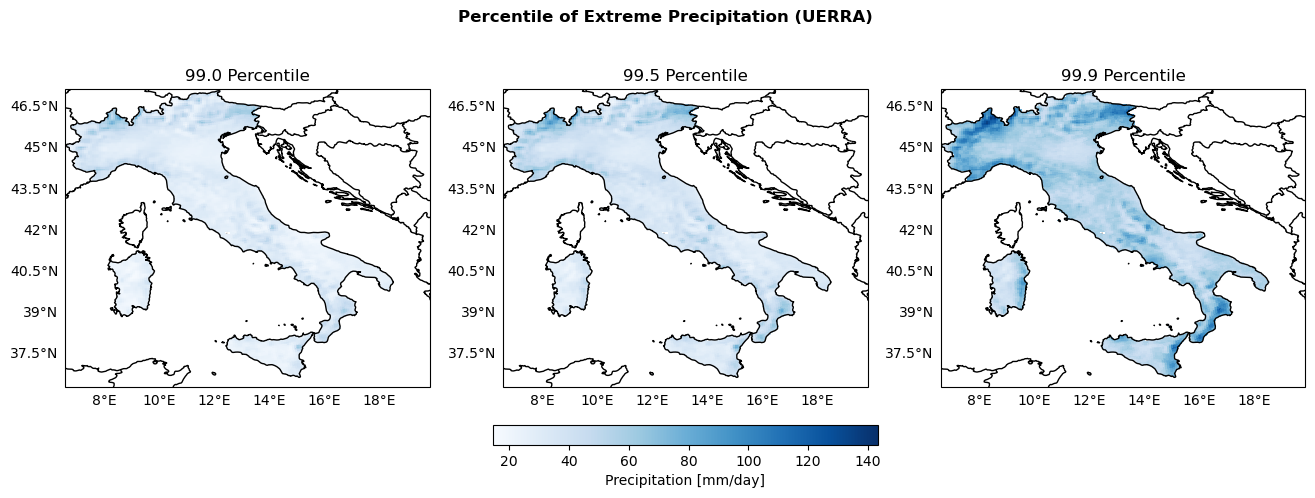

In [10]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(16, 5), subplot_kw={'projection': ccrs.PlateCarree()})
fig.suptitle('Percentile of Extreme Precipitation (UERRA)', fontweight='bold')

plot_kwargs = {
    'cmap': 'Blues',
    'vmin': global_min_PrecipPercentile,
    'vmax': global_max_PrecipPercentile,
    'transform': ccrs.PlateCarree()
}
for ax, percentile in zip(axs, percentiles):
    configure_map(ax, title=f'{percentile} Percentile')
    da = PrecipPercentile_arrays[percentile]
    im = ax.pcolormesh(da['longitude'], da['latitude'], da.values, **plot_kwargs)

fig.colorbar(im, ax=axs, orientation='horizontal', fraction=0.05, pad=0.1, label='Precipitation [mm/day]')

fig.savefig(os.path.join(output_maps, "UERRA_Precip_percentile_comparison.png"))

## Maps of Return Levels based on the Return Periods 10, 20, 30, 50, 100, 150 years

In [11]:
return_ds = xr.open_dataset(os.path.join(indicators_path, 'return_levels_gumbel.nc'))

In [12]:
return_periods = [10, 20, 30, 50, 100, 150]

global_min_ReturnPeriod = np.min([return_ds[f"return_period_{period}_y"].min() for period in return_periods])
global_max_ReturnPeriod = np.max([return_ds[f"return_period_{period}_y"].max() for period in return_periods])

print(f"Global min: {global_min_ReturnPeriod}, Global max: {global_max_ReturnPeriod}")

Global min: 33.809383392333984, Global max: 246.80722045898438


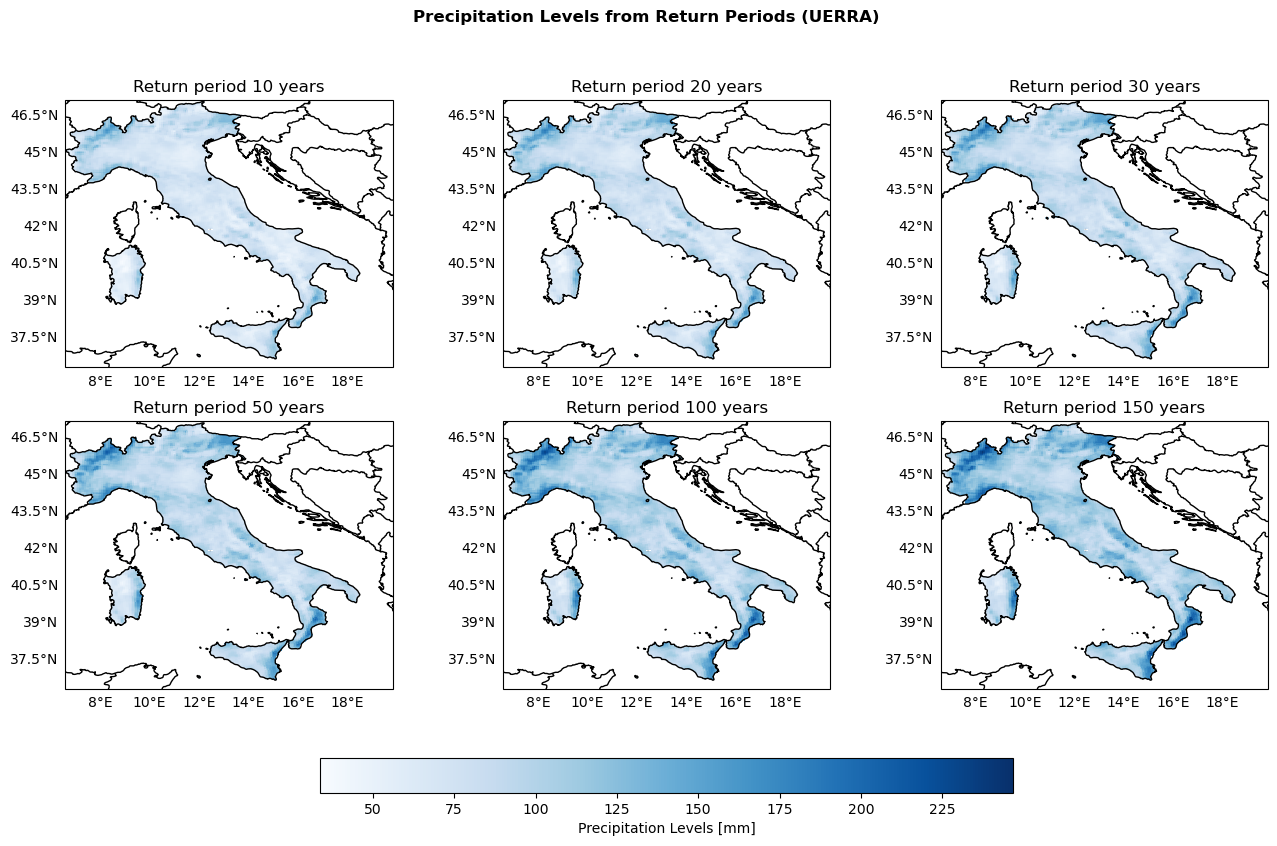

In [13]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(16, 9), subplot_kw={'projection': ccrs.PlateCarree()})
fig.suptitle('Precipitation Levels from Return Periods (UERRA)', fontweight='bold')


plot_kwargs = {
    'cmap': 'Blues',
    'vmin': global_min_ReturnPeriod,
    'vmax': global_max_ReturnPeriod,
    'transform': ccrs.PlateCarree()
}
for ax, period in zip(axs.flatten(), return_periods):
    configure_map(ax, title=f'Return period {period} years')
    da = return_ds[f"return_period_{period}_y"]
    im = ax.pcolormesh(da['longitude'], da['latitude'], da.values, **plot_kwargs)

fig.colorbar(im, ax=axs, orientation='horizontal', fraction=0.05, pad=0.1, label='Precipitation Levels [mm]')

fig.savefig(os.path.join(output_maps, "UERRA_returnPeriod_comparison.png"))